In [1]:
import sys
sys.path.append("/mnt/d/work/searchformer/")

In [2]:
from searchformer.sokoban import Sokoban,AStarSokobanState,sokoban_state_to_pretty_string

pygame 2.6.1 (SDL 2.28.4, Python 3.10.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [33]:
start_state = [
    ["#", "#", "#", "#", "#", "#"],
    ["#", " ", " ", "#", " ", "#"],
    ["#", "#", " ", "$", ".", "#"],
    ["#", " ", " ", " ", " ", "#"],
    ["#", " ", " ", " ", "@", "#"],
    ["#", "#", "#", "#", "#", "#"],
]

In [34]:
sokoban=Sokoban(state=start_state)

In [35]:
a_star_start_state=AStarSokobanState(sokoban=sokoban)

In [36]:
a_star_start_state.sokoban

Sokoban(######-#  # #-## $.#-#    #-#   @#-######)

In [7]:
from queue import Queue
from copy import deepcopy

In [8]:
def bfs(start_state:AStarSokobanState):
    graph={}
    q=Queue()
    visited={}
    q.put(start_state)
    while q.qsize()>0:
        node=q.get()
        state=sokoban_state_to_pretty_string(node.state['state'])
        visited[state]=node
        graph[state]=[]
        #up action
        up_node=deepcopy(node)
        up_node.sokoban.move_up()
        up_state=sokoban_state_to_pretty_string(up_node.state['state'])
        if not visited.get(up_state,None):
            q.put(up_node)
            graph[state].append(up_state)
        #down action
        down_node=deepcopy(node)
        down_node.sokoban.move_down()
        down_state=sokoban_state_to_pretty_string(down_node.state['state'])
        if not visited.get(down_state,None):
            q.put(down_node)
            graph[state].append(down_state)
        
        #left action
        left_node=deepcopy(node)
        left_node.sokoban.move_left()
        left_state=sokoban_state_to_pretty_string(left_node.state['state'])
        if not visited.get(left_state,None):
            q.put(left_node)
            graph[state].append(left_state)
        
        #right action
        right_node=deepcopy(node)
        right_node.sokoban.move_right()
        right_state=sokoban_state_to_pretty_string(right_node.state['state'])
        if not visited.get(right_state,None):
            q.put(right_node)
            graph[state].append(right_state)
    return graph

In [37]:
sokoban_graph=bfs(start_state=a_star_start_state)

In [38]:
print(sokoban_graph)

{'######\n#  # #\n## $.#\n#    #\n#   @#\n######': ['######\n#  # #\n## $.#\n#   @#\n#    #\n######', '######\n#  # #\n## $.#\n#    #\n#  @ #\n######'], '######\n#  # #\n## $.#\n#   @#\n#    #\n######': ['######\n#  # #\n## $+#\n#    #\n#    #\n######', '######\n#  # #\n## $.#\n#  @ #\n#    #\n######'], '######\n#  # #\n## $.#\n#    #\n#  @ #\n######': ['######\n#  # #\n## $.#\n#  @ #\n#    #\n######', '######\n#  # #\n## $.#\n#    #\n# @  #\n######'], '######\n#  # #\n## $+#\n#    #\n#    #\n######': ['######\n#  #@#\n## $.#\n#    #\n#    #\n######', '######\n#  # #\n##$@.#\n#    #\n#    #\n######'], '######\n#  # #\n## $.#\n#  @ #\n#    #\n######': ['######\n#  # #\n## $.#\n# @  #\n#    #\n######'], '######\n#  # #\n## $.#\n#    #\n# @  #\n######': ['######\n#  # #\n## $.#\n# @  #\n#    #\n######', '######\n#  # #\n## $.#\n#    #\n#@   #\n######'], '######\n#  #@#\n## $.#\n#    #\n#    #\n######': [], '######\n#  # #\n##$@.#\n#    #\n#    #\n######': ['######\n#  # #\n##$ .#\n#  @ #\

In [39]:
len(sokoban_graph)

61

In [27]:
for key,value in sokoban_graph.items():
    print(key)
    print("childs")
    for child in value:
        print(child)

######
#  . #
# $  #
# $# #
# .@##
######
childs
######
#  . #
# $  #
# $# #
# + ##
######
######
#  . #
# $  #
# $# #
# + ##
######
childs
######
#  . #
# $  #
# $# #
#@. ##
######
######
#  . #
# $  #
# $# #
#@. ##
######
childs
######
#  . #
# $  #
#@$# #
# . ##
######
######
#  . #
# $  #
#@$# #
# . ##
######
childs
######
#  . #
#@$  #
# $# #
# . ##
######
######
#  . #
#@$  #
# $# #
# . ##
######
childs
######
#@ . #
# $  #
# $# #
# . ##
######
######
#  . #
# @$ #
# $# #
# . ##
######
######
#@ . #
# $  #
# $# #
# . ##
######
childs
######
# @. #
# $  #
# $# #
# . ##
######
######
#  . #
# @$ #
# $# #
# . ##
######
childs
######
# @. #
#  $ #
# $# #
# . ##
######
######
#  . #
#  $ #
# @# #
# * ##
######
######
#  . #
#@ $ #
# $# #
# . ##
######
######
#  . #
#  @$#
# $# #
# . ##
######
######
# @. #
# $  #
# $# #
# . ##
######
childs
######
#  + #
# $  #
# $# #
# . ##
######
######
# @. #
#  $ #
# $# #
# . ##
######
childs
######
#@ . #
#  $ #
# $# #
# . ##
######
######
#  + #

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(adj_list):
    G = nx.Graph()
    
    # Add edges based on adjacency list
    for node, neighbors in adj_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=False, node_color='lightblue', edge_color='gray', font_weight='bold', node_size=30)
    plt.title("Graph Visualization")
    plt.show()

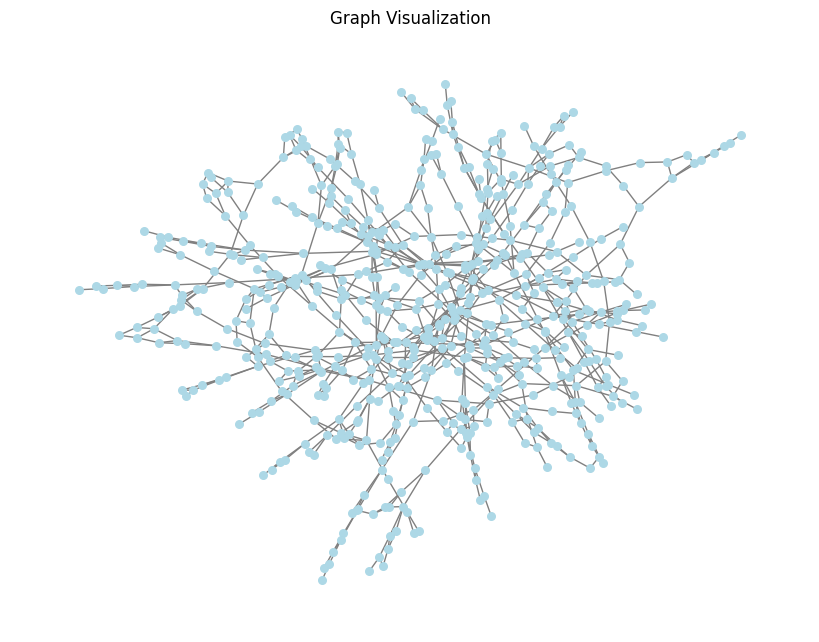

In [37]:
visualize_graph(sokoban_graph)